#Software Development for Data Science
#Module Code: MMI226822
#Coursework 1: Exploratory Data Analysis of the House Prices Dataset
              

#Abstact

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Introduction

The objective of this coursework is to demonstrate proficiency in advanced data analysis techniques acquired during the Software Development for Data Science course using Python. The focus lies in applying these acquired skills to conduct a comprehensive analysis of the Housing Dataset, aiming to derive meaningful insights.
This analysis involves leveraging Google Colab to create a Jupyter notebook, facilitating the exploration of the provided dataset. The process encompasses various stages such as data ingestion, cleansing, transformation, summarization, and visualization, aiming to extract valuable information from the dataset.

##Background
*Provide a brief introduction to the dataset and the context of the analysis.*

##Objectives
*Clearly state the objectives of the exploratory data analysis (EDA) and what you aim to achieve.*

In [4]:
from google.colab import drive   # The code enables imports the Google Drive
drive.mount('/content/drive')    # The code mounts the Google Drive to '/content/drive' allowing you to access files and folders stored in the Google Drive within the Colab notebook.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [5]:
# import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib.patheffects as patheffects
import geopandas as gpd
import geopy
import folium
import warnings
warnings.filterwarnings("ignore")

#The House Prices Data Initial Exploration

The Housing Dataset in view is a comprehensive collection of residential property information compiled by the Assessor’s Office, spanning sales from 2006 to 2010 in a US town. Featuring over 80 descriptive variables, this
dataset encapsulates a myriad of housing attributes, including zoning classifications, structural styles, land characteristics, utilities, and various quality assessments. Offering a rich array of both nominal and ordinal variables, it encompasses details on dwelling types, neighborhood locations, exterior and interior features, along with crucial sale-related information like sale prices, sale conditions, and sale types. Known for its complexity and size, this dataset serves as a treasure trove for predictive modeling, regression analysis, and understanding the dynamics influencing housing prices and market trends, crucial for optimizing investment strategies and maximizing returns in the real estate domain.


In [6]:
Housing_1 = pd.read_csv('/content/drive/MyDrive/Software_Dev/SDfDS_CW1/Housing_1.txt', sep ='\t')
Housing_2 = pd.read_csv('/content/drive/MyDrive/Software_Dev/SDfDS_CW1/Housing_2.txt', sep ='\t')


In [7]:
Housing_1.columns.tolist()   # List all the column names in the Housing_1 dataframe
Housing_2.columns.tolist()   # List all the column names in the Housing_2 dataframe


['Order', 'PID', 'MS SubClass', 'SalePrice']

In [8]:
Housing_1.head(1)    # displays the first row of the DataFrame Housing_1
Housing_2.head(1)   # displays the first row of the DataFrame Housing_1


,Order,PID,MS SubClass,SalePrice
0,1,526301100,20,215000


In [ ]:
ColNot_Housing_1 = set(Housing_2.columns) - set(Housing_1.columns)   #'set operations' to find the columns that exist in Housing_2 but are not present in Housing_1
print(ColNot_Housing_1)  # Print out the columns that are in Housing_2 but not present in Housing_1.

{'SalePrice'}


*The 'SalePrice' variable is missing in the main housing data!*
<br> The SalePrice variable *(target variable)* is a key statistical index for the ‘House Prices Dataset’ data analyses and subsequent modelling will be more representative of typical housing scenarios, allowing for better predictions and decisions related to investment. <br>
As a result, the *'SalePrice'* will therefore be included in the housing dataset using the following codes:

In [9]:
HousingData = Housing_1.copy()  # Creating a copy of Housing_1
HousingData['SalePrice'] = Housing_2['SalePrice']  # Adding 'SalePrice' column from Housing_2
HousingData.columns.tolist() # List all the column names in the new'HousingData' dataframe which includes 'SalePrice'

['Order',
 'PID',
 'MS SubClass',
 'MS Zoning',
 'Lot Frontage',
 'Lot Area',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage 

In [10]:
print('The Number of rows and columns in the Housing_1 dataset is', Housing_1.shape)
print('The Number of rows and columns in the Housing_2 dataset is', Housing_2.shape)
print('The Number of rows and columns in the HousingData dataset is', HousingData.shape) # Prints the shape attributes of the 'HousingData'


The Number of rows and columns in the Housing_1 dataset is (2933, 81)
The Number of rows and columns in the Housing_2 dataset is (2933, 4)
The Number of rows and columns in the HousingData dataset is (2933, 82)


The House Prices Dataset now contains a total of 82 descriptive variables (Columns) and 2933 rows

In [11]:
HousingData.head(2)     # Prints the first two rows of the 'HousingData' and all the columns names

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000


# Describing the House Prices Dataset

In [12]:
print(HousingData.describe())  # generates a statistical summary of the numerical columns in the 'HousingData'

             Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2933.000000  2.933000e+03  2933.000000   2443.000000    2933.000000   
mean   1464.151381  7.142811e+08    57.349131     69.237822   10147.789976   
std     846.579702  1.887213e+08    42.632965     23.354888    7876.008408   
min       1.000000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     731.000000  5.284770e+08    20.000000     58.000000    7441.000000   
50%    1464.000000  5.354532e+08    50.000000     68.000000    9439.000000   
75%    2197.000000  9.071811e+08    70.000000     80.000000   11553.000000   
max    2930.000000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2933.000000   2933.000000  2933.000000     2933.000000   2910.000000   
mean       6.094102      5.562564  1971.344016     1984.241050    102.082818   
std        1.410595      1.111114    30.232331       20.8

The HousingData.describe() function provides several statistical summaries for numerical columns in the dataset. Here are some key insights that can be drawn from the output:

Mean and Median: The mean and median SalePrice is 180,796 dollars and 160,000 dollars respectively, indicating a '*positive skewness'*.

Minimum and Maximum Values: The SalePrice ranges from 12,789 and 755,000 dollars shows variability in house prices.

Standard Deviation: The standard deviation for SalePrice is approximately $79,887, signifying the dispersion or spread of values around the mean.

Interquartile Range (IQR): The difference between the 75th percentile and the 25th percentile (IQR) for SalePrice is $84,000, indicating the spread of the middle 50% of data.

**Skewness and Outliers:**

The difference between mean and median in 'SalePrice' suggests potential skewness or the presence of outliers as will be revealed in the next graphs.

These insights provide an initial understanding of the House Prices dataset's distribution, range, central tendency, and potential data quality issues, which would require further exploration and preprocessing for accurate analysis.

In [13]:

print(HousingData.info())  # Displays basic information about the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2933 non-null   int64  
 1   PID              2933 non-null   int64  
 2   MS SubClass      2933 non-null   int64  
 3   MS Zoning        2933 non-null   object 
 4   Lot Frontage     2443 non-null   float64
 5   Lot Area         2933 non-null   int64  
 6   Street           2933 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2933 non-null   object 
 9   Land Contour     2933 non-null   object 
 10  Utilities        2933 non-null   object 
 11  Lot Config       2933 non-null   object 
 12  Land Slope       2933 non-null   object 
 13  Neighborhood     2933 non-null   object 
 14  Condition 1      2933 non-null   object 
 15  Condition 2      2933 non-null   object 
 16  Bldg Type        2933 non-null   object 
 17  House Style   

Following the HousingData.info(), the merged House Prices Dataset comprises 2933 entries and 82 columns, exhibiting a mix of numerical and categorical data types. There are several columns with missing values denoted by non-null counts lower than the total number of entries.

The Missing Values columns: LotFrontage, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure.

Additionally, certain columns like PoolQC, Fence, MiscFeature, and others display notably fewer non-null counts, suggesting a substantial amount of missing data in these features.

The dataset encompasses various attributes related to housing characteristics, including lot configurations, building types, year built, quality assessment, basement and garage details, porch areas, and sale-related information such as sale price, sales type, and conditions. This comprehensive dataset, while containing missing values in several columns, offers a rich set of features for housing analysis and prediction tasks.

# Data Cleaning of the House Prices Dataset

##Renaming the Housing Data Column Names

In [14]:
HousingData.columns = HousingData.columns.str.replace(' ','') #removes spaces from the column names in the HousingData DataFrame

HousingData.columns.tolist()


['Order',
 'PID',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemod/Add',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 '

Renaming the Housing Data variables by removing spaces from column names
for cleaning and preparing the data for analysis is vital for various reasons:

**Consistency and readability:** Spaces in the Housing Data column names might cause inconsistencies and make it harder to reference columns consistently for a complete data analyses.

**Avoiding errors:** Removing spaces prevents potential errors that might occur due to inadvertent white spaces while referencing the Housing Data column names.

**Compatibility:** When exporting Housing Data or using it in different systems, removing spaces ensures compatibility across platforms and prevents issues arising from differences in how spaces are handled.

By removing spaces in the Housing Data column names during stage of Explorative Data Analyses, a cleaner, more consistent, and error-free data preparation is ensured, making subsequent analysis and manipulation smoother and straighter.

##Histogram of Sales Price Distribution

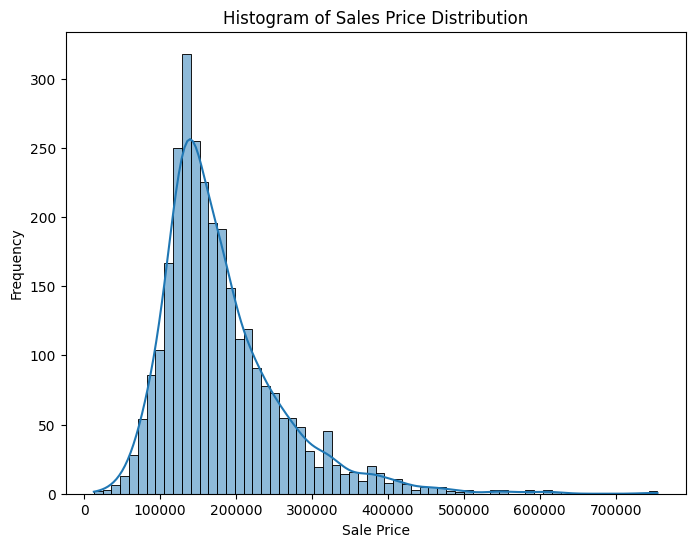

In [15]:
#Histogram of the SalePrice Column
plt.figure(figsize=(8, 6))
sns.histplot(HousingData['SalePrice'], kde=True)
plt.title('Histogram of Sales Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


In [16]:
skewness = HousingData['SalePrice'].skew()
if skewness > 0:
    print(f"The Sales Price distribution is right-skewed with a skewness of {skewness:.2f}.")
elif skewness < 0:
    print(f"The Sales Price distribution is left-skewed with a skewness of {skewness:.2f}.")
else:
    print("The Sales Price distribution is approximately symmetric.")

The Sales Price distribution is right-skewed with a skewness of 1.74.


It is helpful to note that a positive skewness of 1.74 implies the tail on the right side of the distribution is longer as seen in the diagram. In the case of house prices, this would mean a few expensive houses significantly influence the average sale price, causing the distribution to be stretched towards higher prices.

##Checking for Duplicates in the House Prices Data


In [17]:
DuplicateRows = HousingData[HousingData.duplicated()] #Retrieves duplicates rows in the 'HousingData' dataframe
NumOfDuplicates = len(DuplicateRows)
print(f"Number of duplicate rows: {NumOfDuplicates}")

Number of duplicate rows: 3


In [18]:
HousingData = HousingData.drop_duplicates()   # Removes duplicates rows in the HousingData dataframe

In [19]:
print(HousingData.shape)           #Reveals the House Prices Dataset rows without duplicates is 2930

(2930, 82)


The House Prices Dataset containing a total of 82 Columns and 2933 Rows is reduced to 82 Columns and 2930 Rows after being purged of the duplicate rows.

##Treating the Not_Available (Na) Entries in the House Prices Data

In [20]:

MissingValsCol = HousingData.isnull().sum() # Counts NA entries per column

print("Number of NA entries per column:")   #Displays the number of missing values per column
print(MissingValsCol)



Number of NA entries per column:
Order              0
PID                0
MSSubClass         0
MSZoning           0
LotFrontage      490
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 82, dtype: int64


In [21]:
MissingCols = MissingValsCol[MissingValsCol > 0].index.tolist() # Extract columns with NA entries greater than zero

HousingData_NA = HousingData[MissingCols].copy()  # Create a new DataFrame containing only columns with NA entries


In [22]:
NA_CountCol = HousingData_NA.isnull().sum()  # Calculates the count of NA values for each column

HousingData_NACount = pd.DataFrame({'Column': NA_CountCol.index, 'NA Count': NA_CountCol.values}) # Creates a DataFrame displaying columns and their corresponding NA counts

print(HousingData_NACount)  # Displays the columns and their NA counts


          Column  NA Count
0    LotFrontage       490
1          Alley      2732
2     MasVnrType        23
3     MasVnrArea        23
4       BsmtQual        80
5       BsmtCond        80
6   BsmtExposure        83
7   BsmtFinType1        80
8     BsmtFinSF1         1
9   BsmtFinType2        81
10    BsmtFinSF2         1
11     BsmtUnfSF         1
12   TotalBsmtSF         1
13    Electrical         1
14  BsmtFullBath         2
15  BsmtHalfBath         2
16   FireplaceQu      1422
17    GarageType       157
18   GarageYrBlt       159
19  GarageFinish       159
20    GarageCars         1
21    GarageArea         1
22    GarageQual       159
23    GarageCond       159
24        PoolQC      2917
25         Fence      2358
26   MiscFeature      2824


The above code reveals that a total of 26 Columns in the House Prices Dataset  'HousingData' contains NAs.

In [23]:
NaWithSales = pd.merge(HousingData_NA, Housing_2[['SalePrice']], left_index=True, right_index=True) # Includes the 'SalePrice' column to the 'HousingData_NA' dataframe containing columns with NAs for the purpose of investments analyses.

# Display the merged DataFrame
print(NaWithSales.columns.tolist())

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SalePrice']


##Effect of the NA Entries on the House Prices Dataset


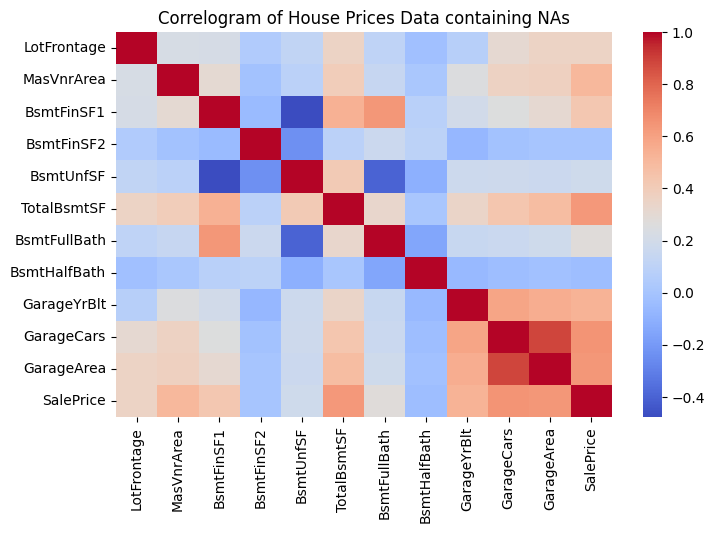

In [24]:
NaCorrMatrix = NaWithSales.corr()  # Calculate the correlation matrix

# Plotting the correlogram using Seaborn's heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(NaCorrMatrix, cmap='coolwarm', fmt='.1f') # Please note that the 'annot=True' condition has been excluded in the heatmap to enhance aesthetics of the diagram
plt.title('Correlogram of House Prices Data containing NAs')
plt.show()


The Correlogram shows that TotalBsmtSF and GarageCars/GarageArea columns in the Housing Dataset having a relatively strong positive linear relationship with the House sales price (SalePrice).
The correlation coefficient of the TotalBsmtSF, GarageCars and GarageArea columns is 0.6 *(revealed by 'annot=True' in the sns.heatmap command line)* while the remaining columns in the dataset containing higher NA entries displayed weak or zero correlation values to House sales price for the houses sold from 2006 to 2010.
          

## Replacing the NA Values in the 'TotalBsmtSF' and 'GarageCars' Columns

In [25]:
HousingData[['TotalBsmtSF','GarageCars']] = HousingData[['TotalBsmtSF','GarageCars']].fillna(0) # Replaces the NAs values with zero values

ColsNaCount = HousingData[['TotalBsmtSF','GarageCars']].isnull().sum()
print(ColsNaCount) # Prints the NA counts in the 'TotalBsmtSF'and 'GarageCars' columns



TotalBsmtSF    0
GarageCars     0
dtype: int64


##Expunging the Housing Data Containing Less Effect on the Homes Price Values   

In [27]:
# List of columns to be deleted
ExpungedData = ['LotFrontage','Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2',
                  'BsmtFinSF2','BsmtUnfSF','Electrical','BsmtFullBath','FireplaceQu','GarageType','GarageFinish','GarageArea','GarageQual',
                  'GarageQual','GarageCond','PoolQC','Fence','MiscFeature','BsmtHalfBath']


HousingDataEx = HousingData.drop(columns=ExpungedData, axis=1)  # Creates a new DataFrame excluding the specified columns

print('The DataFrame now has', HousingDataEx.shape, "Rows and Columns repectively")  # Displays the new dataframe shape


The DataFrame now has (2930, 59) Rows and Columns repectively


##Removing Irregular Sales Figure from the House Prices Dataset

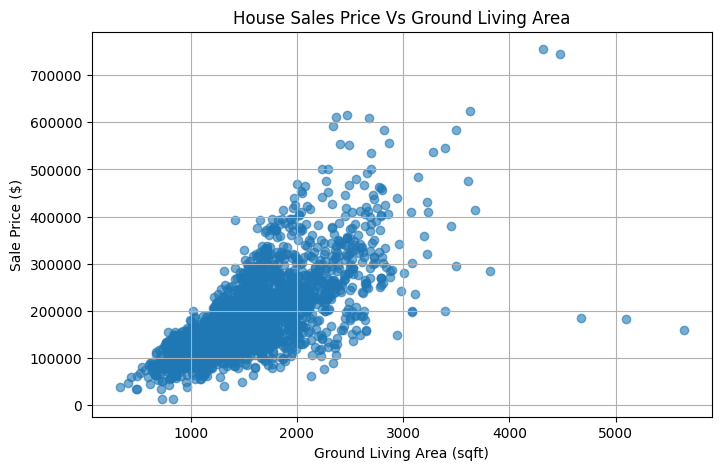

In [28]:
# Scatter plot of House Sales Price Vs Ground Living Area

plt.figure(figsize=(8, 5))
plt.scatter(HousingDataEx['GrLivArea'], HousingDataEx['SalePrice'], alpha=0.6, label='Outliers')
plt.title('House Sales Price Vs Ground Living Area')
plt.xlabel('Ground Living Area (sqft)')
plt.ylabel('Sale Price ($)')
plt.grid(True)
plt.show()



The outliers in the size of house versus the Sales Price is quite noticeable on this plot as the irregularity in linear relationship started showing up at 4000 Sqft of the Ground Living Area. This observation indicates a change in the pattern of the relationship between house size and sales price, revealing feasible anomalies in the housing dataset beyond that threshold. The deviation or break from the linear pattern implies certain extreme values in the dataset, hence indicating the presence of 'outliers'.

In [29]:
HousingDataEx_removed = HousingDataEx[HousingDataEx['GrLivArea'] > 4000] #removes the sales prices greater that $4000

print("The number of irregular sales (Outliers) in the house prices data based on the Ground Living Area are", len(HousingDataEx_removed))
print(HousingDataEx_removed[['GrLivArea','SalePrice']].sort_values('GrLivArea'))


The number of irregular sales (Outliers) in the house prices data based on the Ground Living Area are 5
      GrLivArea  SalePrice
1770       4316     755000
1763       4476     745000
2184       4676     184750
2183       5095     183850
1501       5642     160000


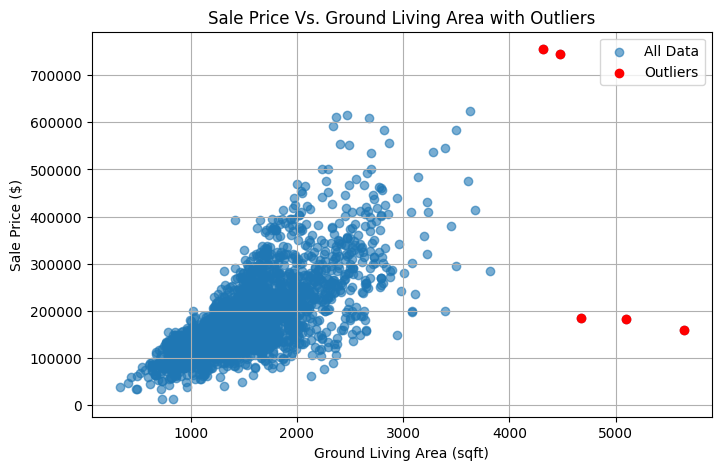

In [30]:
plt.figure(figsize=(8, 5))
plt.scatter(HousingDataEx['GrLivArea'], HousingDataEx['SalePrice'], alpha=0.6, label='All Data')
plt.scatter(HousingDataEx_removed['GrLivArea'], HousingDataEx_removed['SalePrice'], color='red', label='Outliers')
plt.title('Sale Price Vs. Ground Living Area with Outliers')
plt.xlabel('Ground Living Area (sqft)')
plt.ylabel('Sale Price ($)')
plt.legend()
plt.grid(True)
plt.show()


###A review of the five outliers with respect to 'GrLivArea' and 'SalePrice'

**Sale Prices:** Despite their significantly large living areas, the 'SalePrice' for these outliers doesn't show a direct linear correlation with the size of the living area. While a larger living area might generally correlate with higher sale prices, *these particular instances seem to deviate from this trend*. For example, the house with 5095 sqft 'GrLivArea' has a 'SalePrice' of 183850, which is notably lower compared to other observations with smaller living areas but higher prices like 745000.

**Potential Influence on Analysis:** These outliers would significantly influence statistical analyses and subsequent predictive models by skewing relationships between living area and sale price. Removing them would lead to a more accurate analysis helping the goal of the project.

###Removing the outliers with more than 4000 sqft Ground Living Area

In [31]:

HousingDataEx_cleaned = HousingDataEx[HousingDataEx['GrLivArea'] <= 4000]  # Identifies and remove outliers with more than 4000 sqft in 'GrLivArea'

print("Shape of cleaned dataset:", HousingDataEx_cleaned.shape)  # Display the shape of the cleaned dataset to verify removal of outliers


Shape of cleaned dataset: (2925, 59)


After the cleaning operation of the housing dataset and the removal of irregular sales values, the House Prices Dataset now contains 59 Columns and 2925!

#Parametric Correlation Analyses of the Numerical features of the House Prices Dataset

## Correlation Heatmap of the Housing Numerical Data

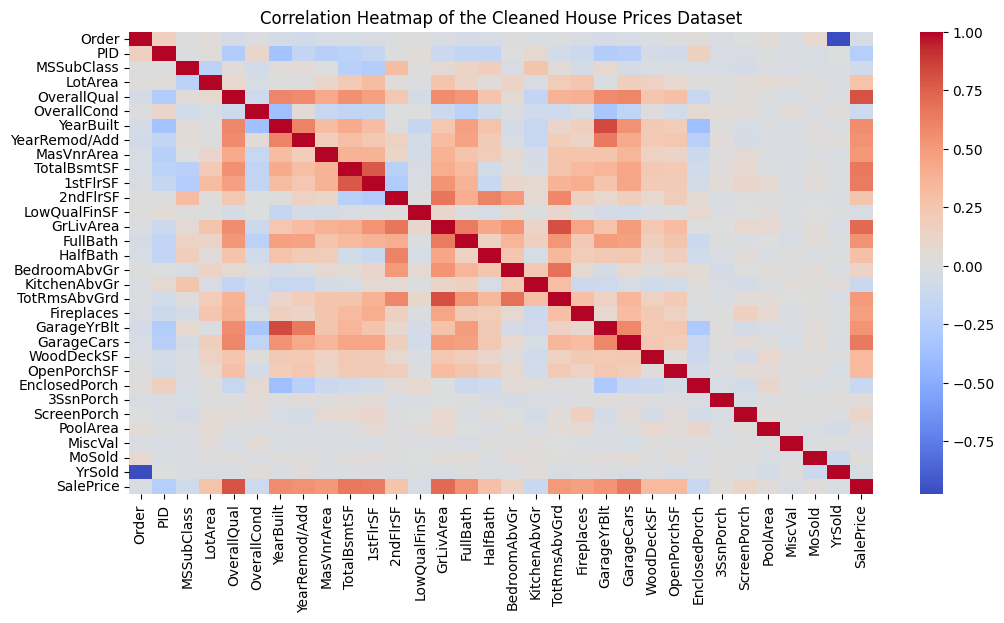

In [32]:
#Correlation heatmap of numerical features
plt.figure(figsize=(12, 6))
sns.heatmap(HousingDataEx_cleaned.corr(), cmap='coolwarm', annot=False, fmt=".1f")
plt.title('Correlation Heatmap of the Cleaned House Prices Dataset')
plt.show()

The correlation heatmap visualizes the relationships between numerical features in the cleaned House Prices dataset. The colors indicate the strength and direction of these relationships: warmer colors (closer to red) represent positive correlations, while cooler colors (closer to blue) denote negative correlations. Observing the map, 'OverallQual', 'GrLivArea', 'GarageCars', and 'TotalBsmtSF' stand out as having notably strong positive correlations with 'SalePrice', signifying that as these features increase in value, the house sale price tends to increase as well. Conversely, certain other features like 'YearBuilt', 'EnclosedPorch', 'KitchenAbvGr', and 'OverallCond' exhibit weaker or negligible correlations with 'SalePrice'. This visualization provides a quick overview of which features might have a more significant influence on the house sale prices.

In [33]:
# Compute the correlation matrix
LowCorrCols = NaCorrMatrix[abs(NaCorrMatrix['SalePrice']) <= 0.6].index.tolist() # Select columns with correlations lower than 0.6 or less than -0.6 with SalePrice

# Display the selected columns
print(LowCorrCols)


['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt']


In [34]:
# Compute the correlation matrix
NaCorrMatrix = HousingDataEx_cleaned.corr(numeric_only=True) #The code computes the correlation matrix for numerical columns in the DataFrame HousingDataEx_cleaned,

# Select columns with correlations greater than 0.6 or less than -0.6 with SalePrice
HighCorrCols = NaCorrMatrix[abs(NaCorrMatrix['SalePrice']) > 0.6].index.tolist()

print(HighCorrCols)  # Displays the selected columns


['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'SalePrice']


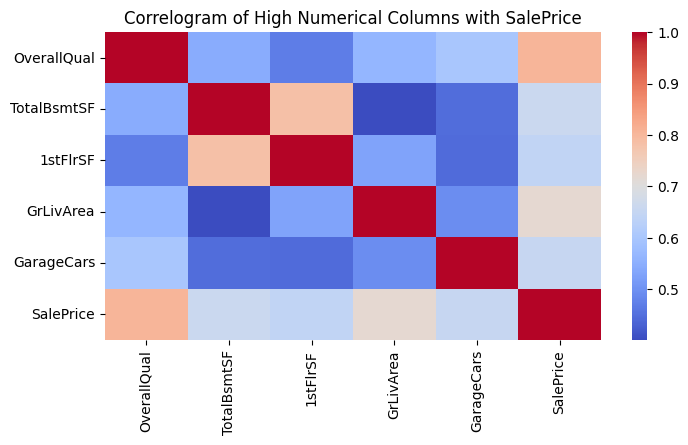

In [35]:
HighCorr = HousingDataEx_cleaned[HighCorrCols] # Create a dataframe with selected columns

plt.figure(figsize=(8, 4)) # Plot the correlogram using seaborn
sns.heatmap(HighCorr.corr(), cmap='coolwarm',annot=False, fmt=".2f") # Please note that the 'annot=False'(it's the default) condition has been included in the heatmap to enhance aesthetics of the diagram
plt.title('Correlogram of High Numerical Columns with SalePrice')
plt.show()


The above graph shows correlations greater than 0.6 or less than -0.6 against 'SalePrice' with the houses 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea'and 'GarageCars' columns carrying the significant correlation with the House Sales Price 'SalePrice' variable.

##Bar chat of the Signicant Numerical Features Detaining the House Prices

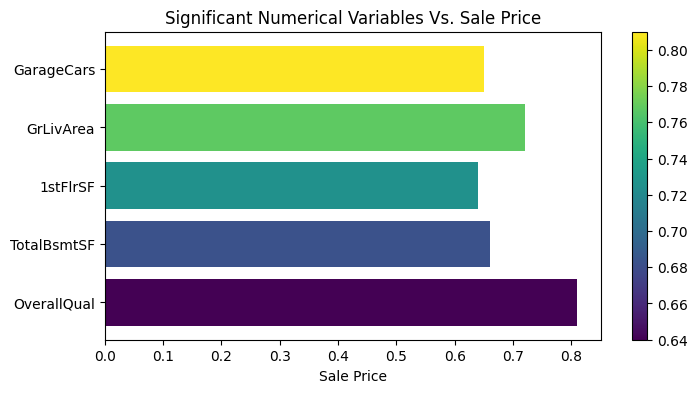

In [36]:

# Columns with significant correlations
SigCols = ['OverallQual', 'TotalBsmtSF','1stFlrSF', 'GrLivArea', 'GarageCars']
correlation_values = [0.81, 0.66, 0.64, 0.72, 0.65]  # Please note that the 'annot=True' condition has been included in the heatmap correlation values for the purpose of this bar plot

# Setting up color gradient
IbroColors = plt.cm.viridis(np.linspace(0, 1, len(SigCols)))

plt.figure(figsize=(8, 4))
bars = plt.barh(SigCols, correlation_values, color=IbroColors)

# Adding labels and title
plt.xlabel('Sale Price')
plt.title('Significant Numerical Variables Vs. Sale Price')

# Custom color gradient legend
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(min(correlation_values), max(correlation_values)))
sm._A = []  # Empty array to feed in the data range
cbar = plt.colorbar(sm)
#cbar.set_label('Correlation Strength')
plt.show()


The graph shows a horizontal bar chart with gradients that depict the correlation strength of the 'OverallQual', 'TotalBsmtSF','1stFlrSF', 'GrLivArea' and 'GarageCars' with respect to the  house sales price.

*Expectedly, it revealed that the overall house quality ('OverallQual') is the most signicant numerical feature determining the price of a house in the House Prices dataset!*

##The Distribution of House Prices Versus the Overall House Quality

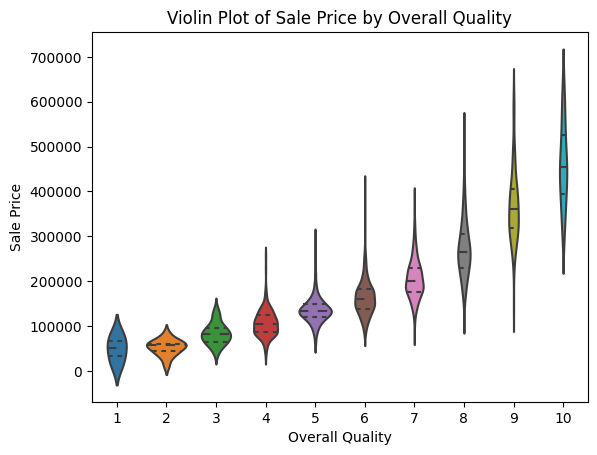

In [37]:
#Generating a violin plot of 'SalePrice' across different levels of 'OverallQual' in the 'HousingDataEx_cleaned' dataset, showing quartiles within each level of 'OverallQual'
sns.violinplot(x='OverallQual', y='SalePrice', data=HousingDataEx_cleaned, inner='quartile')
plt.title('Violin Plot of Sale Price by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

The violin plot showcases the distribution of house sale prices across different overall quality ratings in the House Prices dataset. Each violin-shaped plot represents the distribution of sale prices corresponding to a specific overall quality rating. The width of these violins reflects the density of prices, with wider sections indicating a higher concentration of data points. The central lines within the violins display quartile information, highlighting the median and interquartile range for each quality rating. This visualization provides an insightful view of how sale prices vary concerning the overall quality of houses, allowing for a clear comparison of price distributions across different quality levels.

#Non-Parametric Correlation Analyses of the Categorical features of the House Prices Dataset

##List of the Categorical Variables in the House Prices Dataset

In [38]:
HousingCateg = HousingDataEx_cleaned.select_dtypes(include=['object']) #creates a dataframe for the Categorical columns remaining in the cleaned dataset
#HousingCateg.columns.tolist()
print('Shape of the cleaned House Prices Dataset is', HousingDataEx_cleaned.shape)  #(2925, 59)
print('Shape of the Categorical feautures in the  House Prices Dataset is',HousingCateg.shape)  #(2925, 27)


Shape of the cleaned House Prices Dataset is (2925, 59)
Shape of the Categorical feautures in the  House Prices Dataset is (2925, 27)


##Percentage of Categorical Features in the House Prices Dataset

In [40]:
TotalColumns = len(HousingDataEx_cleaned.columns)
CategoricalCols= len(HousingCateg.columns)
PercentCateg = (CategoricalCols / TotalColumns) * 100
print(f"Percentage of categorical variables in the House Prices Dataset is {PercentCateg:.2f}%")


Percentage of categorical variables in the House Prices Dataset is 45.76%


##The Degree of Relationship of the Categorical Variables with the House Prices Data Using the ANOVA Test

The code below performs ANOVA for each categorical column and filters only those with a p-value less than the specified threshold *(0.05 in this case)*.

In [41]:
from scipy.stats import f_oneway

p_values = {}

for col in HousingCateg.columns:
    groups = []
    for category in HousingDataEx_cleaned[col].unique():
        groups.append(HousingDataEx_cleaned[HousingDataEx_cleaned[col] == category]['SalePrice'])
    f_statistic, p_value = f_oneway(*groups)
    p_values[col] = round(p_value, 8)

p_values_df = pd.DataFrame(list(p_values.items()), columns=['Categorical_Column', 'P-Value'])
print(p_values_df)

   Categorical_Column   P-Value
0            MSZoning  0.000000
1              Street  0.001110
2            LotShape  0.000000
3         LandContour  0.000000
4           Utilities  0.204872
5           LotConfig  0.000000
6           LandSlope  0.000636
7        Neighborhood  0.000000
8          Condition1  0.000000
9          Condition2  0.000000
10           BldgType  0.000000
11         HouseStyle  0.000000
12          RoofStyle  0.000000
13           RoofMatl  0.000928
14        Exterior1st  0.000000
15        Exterior2nd  0.000000
16          ExterQual  0.000000
17          ExterCond  0.000000
18         Foundation  0.000000
19            Heating  0.000021
20          HeatingQC  0.000000
21         CentralAir  0.000000
22        KitchenQual  0.000000
23         Functional  0.000000
24         PavedDrive  0.000000
25           SaleType  0.000000
26      SaleCondition  0.000000


The p-values obtained from the ANOVA test suggest varying degrees of significance regarding their relationship with the Houses Sale Price. The columns 'MSZoning,' 'LotShape,' 'LandContour,' 'LotConfig,', 'Neighborhood', 'Condition1/2',BldgType etc,  exhibit extremely low p-values (almost zero), indicating a strong association with the Sale Price. Conversely, 'Utilities' shows a notably higher p-value (0.204873), which surpasses the commonly used significance level of 0.05. This higher p-value suggests a weaker association between 'Utilities' and Sale Price compared to the other variables mentioned.

##Combined Boxplot and Swarmplot of the Relationship Between Different MSZoning Categories and the Sale Price.

In [42]:
HousingCateg['SalePrice'] = Housing_2['SalePrice']  # Adding 'SalePrice' column from HousingCateg


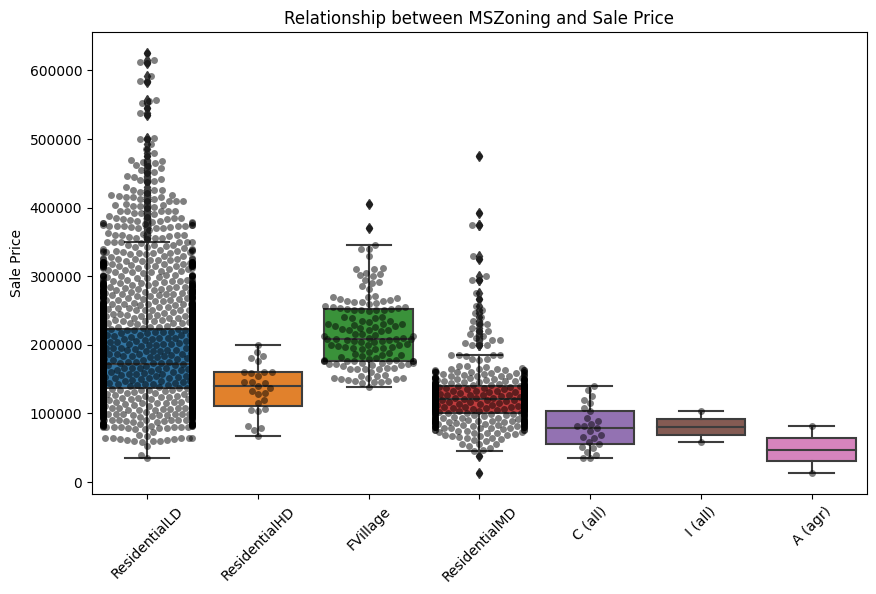

In [43]:
ZoningMap = {
    'A': 'Agriculture',
    'C': 'Commercial',
    'FV': 'FVillage',
    'I': 'Industrial',
    'RH': 'ResidentialHD',
    'RL': 'ResidentialLD',
    'RP': 'ResidentialLDPark',
    'RM': 'ResidentialMD'
}

# Replace the MSZoning values using the mapping dictionary
HousingCateg['MSZoning'] = HousingCateg['MSZoning'].replace(ZoningMap)

plt.figure(figsize=(10, 6))
sns.boxplot(x='MSZoning', y='SalePrice', data=HousingCateg)
sns.swarmplot(x='MSZoning', y='SalePrice', data=HousingCateg, color='black', alpha=0.5)
plt.title('Relationship between MSZoning and Sale Price')
plt.xlabel('')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

From the combined plot above, the Residential Low Density (RL) and Residential Medium Density (RM) MSZoning features stand out prominently. Also, is the Floating Village residential area having a median sales price of over $200,000. These categories exhibit a wider range of sale prices and a larger number of data points, indicating a diverse distribution of house prices within these zoning classifications compared to others.

#More Investments Analysis from the Numeric Values

##Relationship Between Month-Sold and Year-Sold with the Sales Price

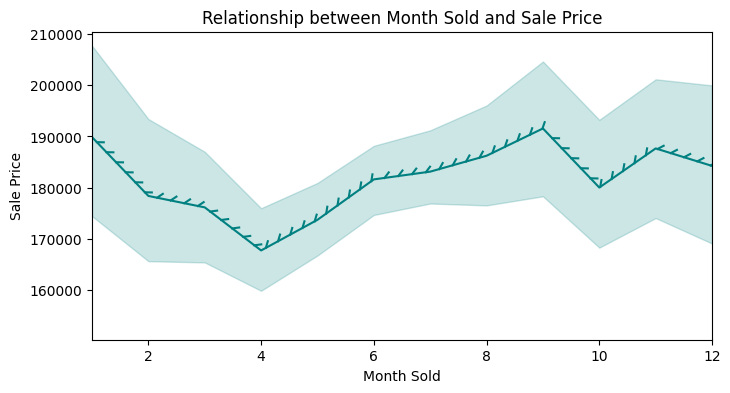

In [44]:
plt.figure(figsize=(8, 4)) # Creates a figure and axis

sns.lineplot(x='MoSold', y='SalePrice', data=HousingDataEx_cleaned, color='teal') # Plots 'MoSold' against 'SalePrice' with custom line styles

path_effects = [patheffects.withTickedStroke(angle=45, length=.5)]  # This code applies a path effect to the lines
for line in plt.gca().lines:
    line.set_path_effects(path_effects)

plt.title('Relationship between Month Sold and Sale Price')
plt.xlabel('Month Sold')
plt.ylabel('Sale Price')
plt.xlim(1, 12) # Limit x-axis from 1 to 12
plt.show() # Shows the plot



 Upon closer inspection, it does seem like there might be a drop in sale prices in the month of April (represented by the number '4'). This could indicate a seasonal trend or specific factors influencing the real estate market during that particular month. Further analysis or domain knowledge about real estate trends in the geographical zone might provide insights into the reasons behind this observed pattern.

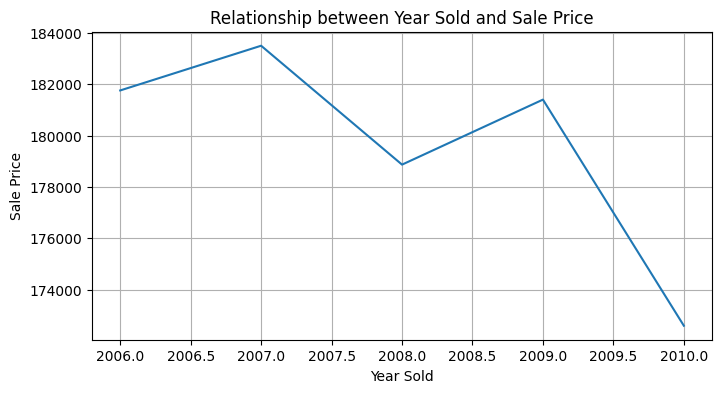

In [45]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='YrSold', y='SalePrice', data=HousingDataEx_cleaned, err_style=None)
plt.title('Relationship between Year Sold and Sale Price')
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')
plt.grid(True)
plt.show()


The line plot revealed sharp drop in market value of the houses sales between 2006 to 2010 with 2007 sticking out as the most amazing year for house sales. The House sales data has witnessed a 'tasteless' investments as prices continued to decline up to the year 2010.

## Time Series of Sum of Sales by House Construction/Re-construction Year

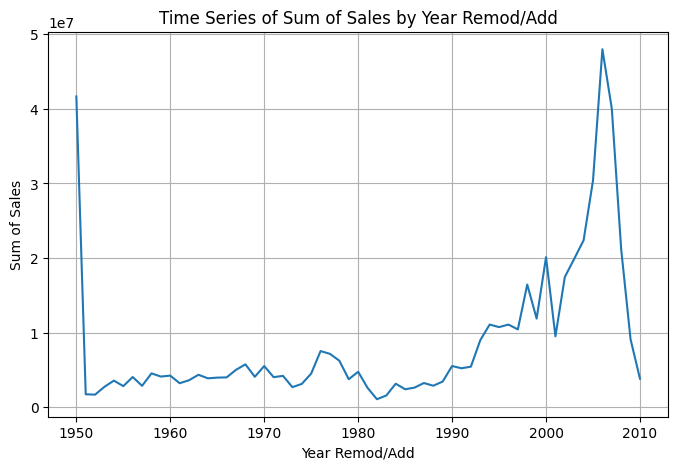

In [46]:
#Renaming the 'YearRemod/Add' column to 'YearRemodAdd' in the 'HousingDataEx_cleaned' DataFrame.
HousingDataEx_cleaned.rename(columns={'YearRemod/Add': 'YearRemodAdd'}, inplace=True)

SaleByYrRemod = HousingDataEx_cleaned.groupby('YearRemodAdd')['SalePrice'].sum().reset_index() # Calculates the sum of sales by 'Year Remod/Add'

# Plotting the time series graph
plt.figure(figsize=(8, 5))
sns.lineplot(x='YearRemodAdd', y='SalePrice', data=SaleByYrRemod)
plt.title('Time Series of Sum of Sales by Year Remod/Add')
plt.xlabel('Year Remod/Add')
plt.ylabel('Sum of Sales')
plt.grid(True)
plt.show()


The year 2007 stands out significantly in the Time Series plot of Sum of Sales by YearRemod/Add, marked by a substantial spike in total sales amidst the global financial crisis. This noticeable increase was followed by a decline in property sales before and around 2010, coinciding with the crisis's aftermath, impacting the housing market. The global financial downturn had a substantial impact on real estate markets worldwide, including Ames neighbourhood in the United State. However, while this historical trend aligns with broader economic events, Ames' housing market dynamics during this period might involve more complex elements. To gain a comprehensive understanding, a localized analysis considering Ames' specific economic conditions, regional housing trends, policy changes, and other relevant variables would provide deeper insights into market behavior during this period.

#Geographical Analysis of Real Estate Dynamics of the House Prices Dataset

In [51]:
HousingCateg = {
    'Neighborhood': ['Blmngtn', 'Sawyer', 'CollgCr', 'Mitchel'],
    'SalePrice': [200000, 300000, 250000, 280000],
    'Address': ['Bloomington Heights, Ames, IA', 'Sawyer, Ames, IA', 'College Creek, Ames, IA', 'Mitchell, Ames, IA']
}
df = pd.DataFrame(HousingCateg)
geolocator = geopy.Nominatim(user_agent="housing_app")  # Initialize a geocoder (use appropriate provider, like Nominatim)
# Geocoding the addresses to get latitude and longitude
df['Location'] = df['Address'].apply(geolocator.geocode)
df['Latitude'] = df['Location'].apply(lambda loc: loc.latitude if loc else None)
df['Longitude'] = df['Location'].apply(lambda loc: loc.longitude if loc else None)
# Creating a folium map centered around the mean of the coordinates
Ibro_Map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)
# Adding markers for each location with sale price as tooltip
for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Sale Price: ${row['SalePrice']}",
        tooltip=row['Neighborhood']
    ).add_to(Ibro_Map)
Ibro_Map
